<a href="https://colab.research.google.com/github/nirajpalve/Stroke-Prediction/blob/main/Niraj_Palve_3F_Stroke_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center><font color = 'red'><b>  STROKE PREDICTION</b></font></center>

![](https://media.istockphoto.com/photos/man-with-brain-stroke-symptoms-picture-id1168179082?k=20&m=1168179082&s=612x612&w=0&h=9OY1eRZhghhh4LPvsnxE5vx6G9tVF4piDqvRMrBdp3Y=)

## <font color = 'blue'>Problem Statement :</font>
- `A stroke occurs when the blood supply to part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die in minutes. A stroke is a medical emergency, and prompt treatment is crucial. Early action can reduce brain damage and other complications.`
- `Determine what makes a person at risk for stroke.`
- `Create a machine learning model to perform early detection of stroke for patients.`

# <font color = 'blue'><b>1 <span style='color:#0386f7de'>|</span> Importing Libraries & Loading Dataset</b></font>
- **`For Data Manipulation`**: numpy, pandas, sklearn.
- **`For Data Visualization`**: matplotlib, seaborn, plotly.
- **`For ML Models`**: sklearn.


In [1]:
import numpy as np      
import pandas as pd                  ## Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
import warnings 
warnings.filterwarnings('ignore')

Dataset -
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [2]:
url = 'https://raw.githubusercontent.com/nirajpalve/Stroke-Prediction/main/stroke-data.csv'

In [3]:
data = pd.read_csv(url)    ## Loading Dataset
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


##  <font color = 'blue'> <span style='color:#0386f7de'>|</span> About the Dataset <a id="prep"></a></font>

-`According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.`

-`Attribute Information`

- `1) Id: Unique identifier.`
- `2) Gender: "Male", "Female" or "Other".`
- `3) Age: Age of the patient.`
- `4) Hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension.`
- `5) Heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease.`
- `6) Ever_married: "No" or "Yes".`
- `7) Work_type: "Children", "Govt job", "Never worked", "Private" or "Self-employed".`
- `8) Residence_type: "Rural" or "Urban".`
- `9) Avg_glucose_level: Average glucose level in blood.`
- `10) BMI: Body Mass Index.`
- `11) Smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown".`
- `12) Stroke: 1 if the patient had a stroke or 0 if not.`


#  <font color = 'blue'><b>2 <span style='color:#0386f7de'>|</span> Exploratory Data Analysis(EDA) <a id="prep"></a></font>

In [4]:
data.info()  ## To check wheather null value exist or not 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
data.isnull().sum()   ##  Drop nulls or treat null values as instructed

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### The dataset contains some missing values in bmi column.Let's try to remove or fill that first before moving on. Looking into it I found that bmi mostly depends on age and gender. So trying to impute missing values based on gender.

#### After looking the data we get to know that there are 201 NA values in _bmi_ column, so for treating the data we will put the nan values as median.

In [6]:
data['bmi'].median()

28.1

In [7]:
data_1 = data.fillna(28.1)

In [8]:
data_1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [9]:
data_1.info()  ## we can see that inour data we dont have any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
data.drop(index = data[data['gender']=='Other'].index[0] , axis=0, inplace = True)  ## Dropping other-gender from gender's column

In [11]:
data.drop('id', axis = 1, inplace = True)  ## Removing 'id' column from the data.

In [12]:
df = data_1  

In [13]:
df.describe()  ## Describe the data.

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#  <font color = 'blue'><b>3 <span style='color:#0386f7de'>|</span> Data Visualization <a id="prep"></a></font>

##  <font color = 'green'> <span style='color:#0386f7de'>|</span> Categorical Data <a id="prep"></a></font>

###  <font color = 'green'>1.1 <span style='color:#0386f7de'>|</span> Gender <a id="prep"></a></font>

In [14]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',df['gender'].unique())
print('Value Counts\n',df['gender'].value_counts())

Unique values
 ['Male' 'Female' 'Other']
Value Counts
 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


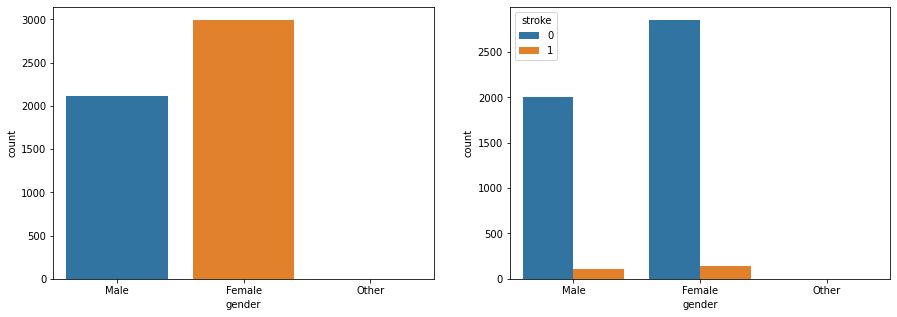

In [15]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Gender Visualization.
sns.countplot(df['gender'], data=df, ax = axes[0])
sns.countplot(df['gender'], hue='stroke', data=df, ax = axes[1])
plt.show()

Observation:- We can see that, there is not much difference between stroke rate concerning gender.

###  <font color = 'green'>1.2 <span style='color:#0386f7de'>|</span> Hypertension <a id="prep"></a></font>

In [16]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',df['hypertension'].unique())
print('Value Counts\n',df['hypertension'].value_counts())

Unique values
 [0 1]
Value Counts
 0    4612
1     498
Name: hypertension, dtype: int64


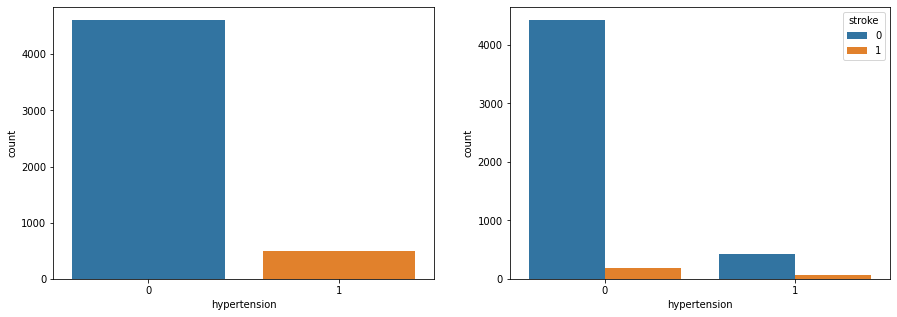

In [17]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Hypertension Visualization.
sns.countplot(df['hypertension'], data=df, ax = axes[0])
sns.countplot(df['hypertension'], hue='stroke', data=df, ax = axes[1])
plt.show()

Observation:- Hypertension is rare in young people and common in aged people. Hypertension can cause a stroke. It has quite little data on patients having hypertension.

###  <font color = 'green'>1.3 <span style='color:#0386f7de'>|</span> Heart Disease <a id="prep"></a></font>

In [18]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',df['heart_disease'].unique())
print('Value Counts\n',df['heart_disease'].value_counts())

Unique values
 [1 0]
Value Counts
 0    4834
1     276
Name: heart_disease, dtype: int64


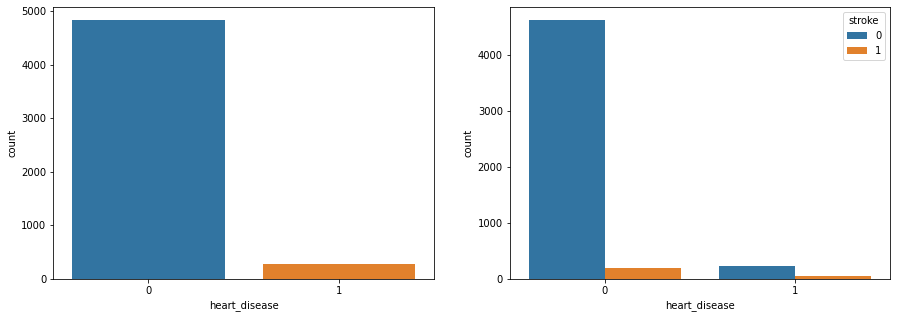

In [19]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Heart_Disease Visualization.
sns.countplot(df['heart_disease'], data=df, ax = axes[0])
sns.countplot(df['heart_disease'], hue='stroke', data=df, ax = axes[1])
plt.show()

It’s a little bit difficult to get an idea. But as per this plot, we can say that heart disease is not affecting Stroke.

###  <font color = 'green'>1.4 <span style='color:#0386f7de'>|</span> Marital Status <a id="prep"></a></font>

In [20]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',df['ever_married'].unique())
print('Value Counts\n',df['ever_married'].value_counts())

Unique values
 ['Yes' 'No']
Value Counts
 Yes    3353
No     1757
Name: ever_married, dtype: int64


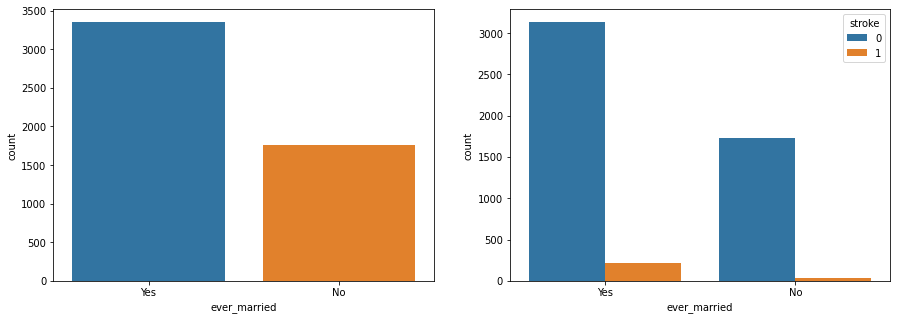

In [21]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Ever_Married Visualization.
sns.countplot(df['ever_married'], data=df, ax = axes[0])
sns.countplot(df['ever_married'], hue='stroke', data=df, ax = axes[1])
plt.show()

As per the plot, there is little bit possibility that married person can have stroke.

###  <font color = 'green'>1.5 <span style='color:#0386f7de'>|</span> Work Type <a id="prep"></a></font>

In [22]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',df['work_type'].unique())
print('Value Counts\n',df['work_type'].value_counts())

Unique values
 ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Value Counts
 Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


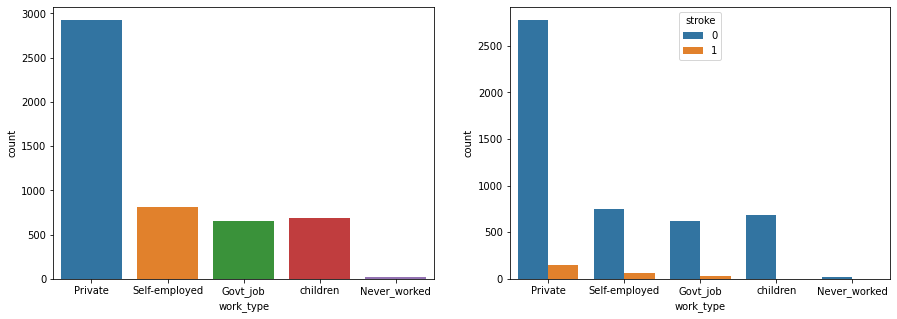

In [23]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Work_Type Visualization.
sns.countplot(df['work_type'], data=df, ax = axes[0])
sns.countplot(df['work_type'], hue='stroke', data=df, ax = axes[1])
plt.show()

People working in the Private sector have a higher risk of getting a stroke. And people who have never worked have a very less stroke rate.

###  <font color = 'green'>1.6 <span style='color:#0386f7de'>|</span> Residence Type <a id="prep"></a></font>

In [24]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',df['Residence_type'].unique())
print('Value Counts\n',df['Residence_type'].value_counts())

Unique values
 ['Urban' 'Rural']
Value Counts
 Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


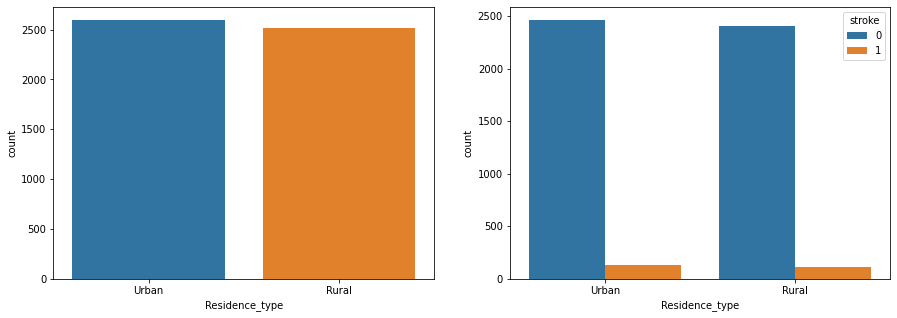

In [25]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Residence_Type Visualization.
sns.countplot(df['Residence_type'], data=df, ax = axes[0])
sns.countplot(df['Residence_type'], hue='stroke', data=df, ax = axes[1])
plt.show()

As we can see there not much difference in both attribute values. 

###  <font color = 'green'>1.7 <span style='color:#0386f7de'>|</span> Smoking Status <a id="prep"></a></font>

In [26]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',df['smoking_status'].unique())
print('Value Counts\n',df['smoking_status'].value_counts())

Unique values
 ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Value Counts
 never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


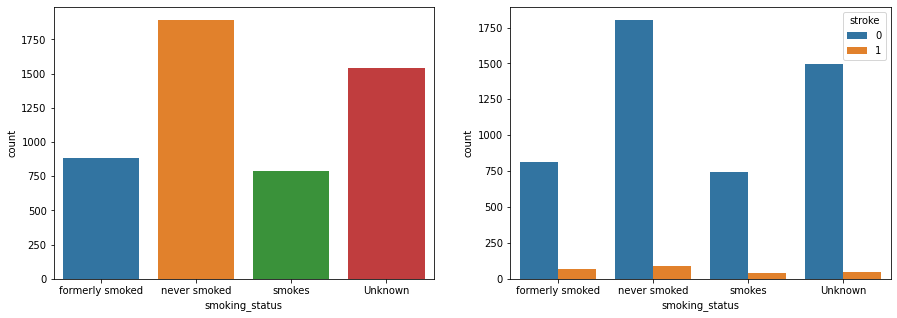

In [27]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Smoking_Status Visualization.
sns.countplot(df['smoking_status'], data=df, ax = axes[0])
sns.countplot(df['smoking_status'], hue='stroke', data=df, ax = axes[1])
plt.show()

As per these plots, we can see there is not much difference in the chances of stroke irrespective of smoking status.

###  <font color = 'green'>1.8 <span style='color:#0386f7de'>|</span> Stroke <a id="prep"></a></font>

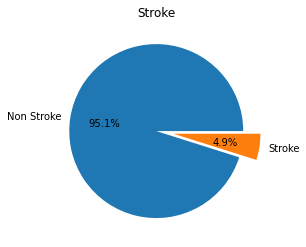

In [28]:
plt.title("Stroke")     ## Stroke Visualization
plt.pie(np.array(df['stroke'].value_counts()),labels=['Non Stroke','Stroke'],explode=[0,0.2],autopct='%1.1f%%')
plt.show()

##  <font color = 'green'> <span style='color:#0386f7de'>|</span> Numerical Data <a id="prep"></a></font>

###  <font color = 'green'>2.1 <span style='color:#0386f7de'>|</span> Age <a id="prep"></a></font>

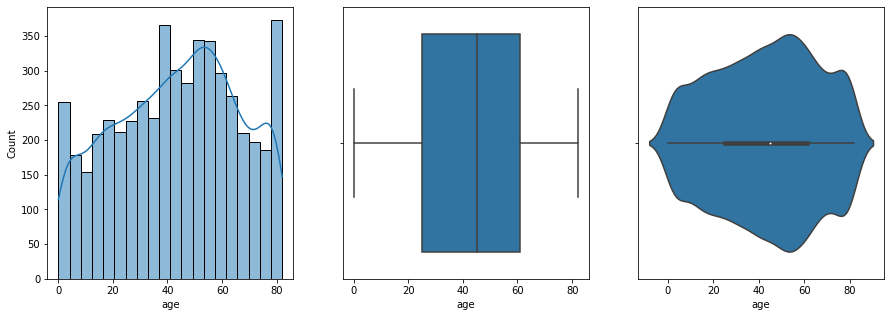

In [29]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.histplot(df['age'], ax = ax[0], kde=True)     ## Age Visualization
sns.boxplot(data = df, x = df['age'], ax = ax[1])
sns.violinplot(data = df, x = df['age'], ax = ax[2])
plt.show()

###  <font color = 'green'>2.2 <span style='color:#0386f7de'>|</span> Average_glucose_level <a id="prep"></a></font>

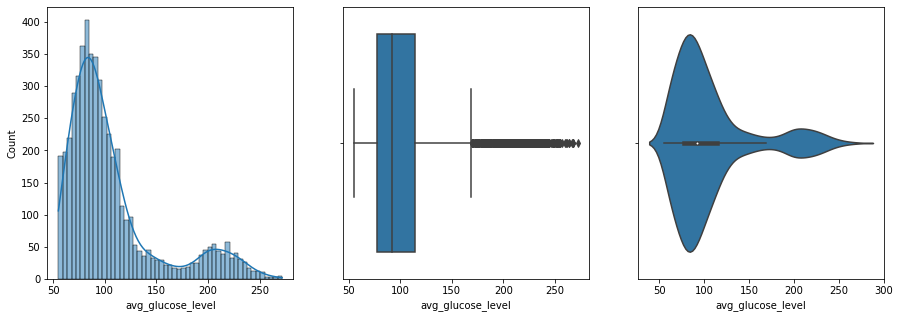

In [30]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.histplot(df['avg_glucose_level'], ax = ax[0], kde=True)    ## Glucose_level Visualization
sns.boxplot(data = df, x = df['avg_glucose_level'], ax = ax[1])
sns.violinplot(data = df, x = df['avg_glucose_level'], ax = ax[2])
plt.show()

### [Link](https://www.lark.com/resources/blood-sugar-chart)

There are outliers present in avgerage_glucose column, we dont have to remove the outliers.

If we will not remove it will be help to our model to predict or perform well.

###  <font color = 'green'>2.3 <span style='color:#0386f7de'>|</span>BMI <a id="prep"></a></font>

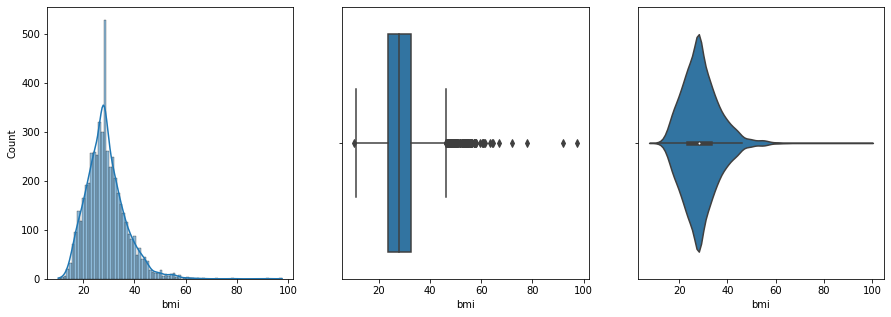

In [31]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.histplot(df['bmi'], ax = ax[0], kde=True)     ## BMI Visualization
sns.boxplot(data = df, x = df['bmi'], ax = ax[1])
sns.violinplot(data = df, x = df['bmi'], ax = ax[2])
plt.show()

Looking at the BMI Visualization of box plot, we can see there are outliers in our data.

In [32]:
util_percentiles=df['bmi'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.93,0.95,0.96,0.97,0.975,0.98,0.99,1])
round(util_percentiles,2)

0.050    17.70
0.100    19.89
0.250    23.80
0.500    28.10
0.750    32.80
0.800    34.30
0.900    38.70
0.910    39.30
0.930    40.80
0.950    42.66
0.960    43.80
0.970    45.10
0.975    46.10
0.980    48.08
0.990    52.89
1.000    97.60
Name: bmi, dtype: float64

In [33]:
print((df['bmi']>42).sum())  ## Total number of outliers from BMI column
print((df['bmi']<15).sum())  

283
42


In [34]:
((df['bmi']>42).sum()/len(df['bmi']))*100  ## Approximately 5.5% of BMI data is outlier. 

5.53816046966732

In [35]:
((df['bmi']<15).sum()/len(df['bmi']))*100  ## Approximately 0.8% of BMI data is outlier.

0.821917808219178

In [36]:
df['bmi'].median()  ## Median of bmi column

28.1

In [37]:
df['bmi_1']=df['bmi']   ##   Imputation with median
df['bmi_1'][df['bmi']>42]=df['bmi'].median()
df['bmi_1'][df['bmi']<15]=df['bmi'].median()
round(df['bmi_1'].describe())

count    5110.0
mean       28.0
std         6.0
min        15.0
25%        24.0
50%        28.0
75%        32.0
max        42.0
Name: bmi_1, dtype: float64

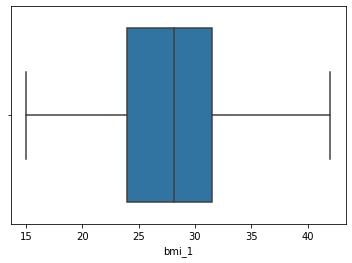

In [38]:
sns.boxplot(data = df, x = df['bmi_1'])
plt.show()

In [39]:
df.drop('bmi', axis = 1, inplace = True )  ## Dropping earlier column of bmi

##  <font color = 'green'> <span style='color:#0386f7de'>|</span> Over Sampling <a id="prep"></a></font>

After looking our stroke visualization, we can tell that our data is not equally distributed. So here we will use over sampling method to balance our target variable.

In [40]:
class_count_yes,class_count_no = df['stroke'].value_counts()
class_yes  = df[df['stroke']==1]
class_no   = df[df['stroke']==0]
print('Class Yes :',class_yes.shape)
print('Class No  :',class_no.shape)

Class Yes : (249, 12)
Class No  : (4861, 12)


In [41]:
class_yes_over = class_yes.sample(n=4860,random_state=15,replace=True)
df_1 = pd.concat([class_yes_over,class_no],axis=0)

In [42]:
df_1.shape

(9721, 12)

In [43]:
df_1.value_counts(df_1['stroke'])

stroke
0    4861
1    4860
dtype: int64

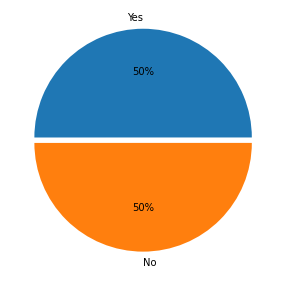

In [44]:
plt.figure(figsize=(8,5))
plt.pie(x=df_1['stroke'].value_counts(),explode=(0.05,0),autopct='%1.0f%%',labels=['Yes','No'])
plt.show()

##  <font color = 'blue'><b>4 <span style='color:#0386f7de'>|</span> Data Preprocessing <a id="prep"></a></font>

###  <font color = 'green'>4.1 <span style='color:#0386f7de'>|</span> One Hot Encoding  <a id="prep"></a></font>

In [45]:
num_cols = ['age','avg_glucose_level','bmi_1']         ## Dividing numerical and categorical data for  
cat_cols = ['gender','ever_married','work_type','Residence_type','smoking_status']

In [46]:
df_enc = pd.get_dummies(df_1[cat_cols], drop_first=True)
df_enc.head()

,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
200,1,0,1,0,1,0,0,1,0,0,0
245,0,0,0,0,0,0,1,0,0,0,0
140,1,0,1,0,0,0,0,0,0,1,0
133,0,0,1,0,1,0,0,0,1,0,0
119,0,0,1,0,1,0,0,1,0,1,0


In [47]:
df_1[df_enc.columns] = df_enc
df_1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,...,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
200,54695,Male,74.0,0,0,Yes,Private,Urban,167.13,Unknown,...,0,1,0,1,0,0,1,0,0,0
245,49669,Female,14.0,0,0,No,children,Rural,57.93,Unknown,...,0,0,0,0,0,1,0,0,0,0
140,20439,Male,82.0,0,1,Yes,Govt_job,Rural,103.68,never smoked,...,0,1,0,0,0,0,0,0,1,0
133,31563,Female,38.0,0,0,Yes,Private,Rural,101.45,formerly smoked,...,0,1,0,1,0,0,0,1,0,0
119,5563,Female,77.0,0,0,Yes,Private,Urban,105.22,never smoked,...,0,1,0,1,0,0,1,0,1,0


In [48]:
df_1.drop(['gender','ever_married','work_type','Residence_type','smoking_status'], axis =1, inplace = True)

In [49]:
df_final = df_1

In [50]:
df_final

,id,age,hypertension,heart_disease,avg_glucose_level,stroke,bmi_1,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
200,54695,74.0,0,0,167.13,1,28.1,1,0,1,0,1,0,0,1,0,0,0
245,49669,14.0,0,0,57.93,1,30.9,0,0,0,0,0,0,1,0,0,0,0
140,20439,82.0,0,1,103.68,1,25.0,1,0,1,0,0,0,0,0,0,1,0
133,31563,38.0,0,0,101.45,1,28.1,0,0,1,0,1,0,0,0,1,0,0
119,5563,77.0,0,0,105.22,1,31.0,0,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,0,28.1,0,0,1,0,1,0,0,1,0,1,0
5106,44873,81.0,0,0,125.20,0,40.0,0,0,1,0,0,1,0,1,0,1,0
5107,19723,35.0,0,0,82.99,0,30.6,0,0,1,0,0,1,0,0,0,1,0
5108,37544,51.0,0,0,166.29,0,25.6,1,0,1,0,1,0,0,0,1,0,0


In [51]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9721 entries, 200 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              9721 non-null   int64  
 1   age                             9721 non-null   float64
 2   hypertension                    9721 non-null   int64  
 3   heart_disease                   9721 non-null   int64  
 4   avg_glucose_level               9721 non-null   float64
 5   stroke                          9721 non-null   int64  
 6   bmi_1                           9721 non-null   float64
 7   gender_Male                     9721 non-null   uint8  
 8   gender_Other                    9721 non-null   uint8  
 9   ever_married_Yes                9721 non-null   uint8  
 10  work_type_Never_worked          9721 non-null   uint8  
 11  work_type_Private               9721 non-null   uint8  
 12  work_type_Self-employed         

In [52]:
X = df_final.drop(columns = 'stroke')  
y = df_final[['stroke']]

###  <font color = 'green'>4.2 <span style='color:#0386f7de'>|</span> Scaling All the Features <a id="prep"></a></font>

In [53]:
X_scaled = StandardScaler()
X_scaled = X_scaled.fit_transform(X)
X_scaled = pd.DataFrame(data=X_scaled, columns = X.columns)
X_scaled

,id,age,hypertension,heart_disease,avg_glucose_level,bmi_1,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.833253,0.851497,-0.467904,-0.366297,0.874466,-0.074230,1.161307,-0.010143,0.560677,-0.047626,0.850456,-0.518391,-0.285364,0.951882,-0.535441,-0.768425,-0.435039
1,0.600125,-1.827732,-0.467904,-0.366297,-1.094777,0.461517,-0.861098,-0.010143,-1.783557,-0.047626,-1.175839,-0.518391,3.504291,-1.050551,-0.535441,-0.768425,-0.435039
2,-0.755690,1.208728,-0.467904,2.730026,-0.269751,-0.667379,1.161307,-0.010143,0.560677,-0.047626,-1.175839,-0.518391,-0.285364,-1.050551,-0.535441,1.301362,-0.435039
3,-0.239710,-0.756040,-0.467904,-0.366297,-0.309965,-0.074230,-0.861098,-0.010143,0.560677,-0.047626,0.850456,-0.518391,-0.285364,-1.050551,1.867618,-0.768425,-0.435039
4,-1.445704,0.985459,-0.467904,-0.366297,-0.241980,0.480650,-0.861098,-0.010143,0.560677,-0.047626,0.850456,-0.518391,-0.285364,0.951882,-0.535441,1.301362,-0.435039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9716,-0.857967,1.119420,2.137190,-0.366297,-0.629156,-0.074230,-0.861098,-0.010143,0.560677,-0.047626,0.850456,-0.518391,-0.285364,0.951882,-0.535441,1.301362,-0.435039
9717,0.377666,1.164074,-0.467904,-0.366297,0.118327,2.202694,-0.861098,-0.010143,0.560677,-0.047626,-1.175839,1.929047,-0.285364,0.951882,-0.535441,1.301362,-0.435039
9718,-0.788901,-0.890002,-0.467904,-0.366297,-0.642861,0.404115,-0.861098,-0.010143,0.560677,-0.047626,-1.175839,1.929047,-0.285364,-1.050551,-0.535441,1.301362,-0.435039
9719,0.037715,-0.175541,-0.467904,-0.366297,0.859318,-0.552576,1.161307,-0.010143,0.560677,-0.047626,0.850456,-0.518391,-0.285364,-1.050551,1.867618,-0.768425,-0.435039


###  <font color = 'green'>4.3 <span style='color:#0386f7de'>|</span>Checking Correlation between Input Variables <a id="prep"></a></font>

In [54]:
corr_matrix = X_scaled.corr()
corr_matrix

,id,age,hypertension,heart_disease,avg_glucose_level,bmi_1,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,1.000000,-0.010741,-0.024772,0.029102,0.022379,0.020134,0.005747,0.009139,0.004173,0.003410,0.020762,-0.048620,0.007306,-0.002965,0.012754,-0.018455,-0.010456
age,-0.010741,1.000000,0.273894,0.265249,0.266228,0.237954,0.014208,-0.013104,0.561248,-0.082408,0.061557,0.281698,-0.612480,0.028461,0.196057,0.110008,-0.007829
hypertension,-0.024772,0.273894,1.000000,0.079199,0.170568,0.095878,-0.009978,-0.004746,0.090838,-0.022285,-0.064721,0.158841,-0.133523,-0.018254,0.055359,0.119135,0.005232
heart_disease,0.029102,0.265249,0.079199,1.000000,0.254079,0.117529,0.135505,-0.003715,0.074705,-0.017445,0.043027,0.000327,-0.103321,0.020835,0.048804,-0.071825,0.116668
avg_glucose_level,0.022379,0.266228,0.170568,0.254079,1.000000,0.196041,0.120158,0.004516,0.203339,-0.019407,0.074517,-0.012661,-0.134170,0.019508,0.060720,0.013653,0.032908
bmi_1,0.020134,0.237954,0.095878,0.117529,0.196041,1.000000,0.031123,-0.011815,0.274052,-0.028181,0.149254,0.034593,-0.381117,0.009618,0.105837,0.039765,0.095595
gender_Male,0.005747,0.014208,-0.009978,0.135505,0.120158,0.031123,1.000000,-0.008734,0.026793,0.007149,0.046447,-0.041080,0.038892,0.011884,0.084372,-0.155724,0.056486
gender_Other,0.009139,-0.013104,-0.004746,-0.003715,0.004516,-0.011815,-0.008734,1.000000,-0.018091,-0.000483,0.008626,-0.005258,-0.002894,-0.010656,0.018943,-0.007794,-0.004413
ever_married_Yes,0.004173,0.561248,0.090838,0.074705,0.203339,0.274052,0.026793,-0.018091,1.000000,-0.084944,0.124690,0.147230,-0.508964,-0.032942,0.184889,0.015560,0.090315
work_type_Never_worked,0.003410,-0.082408,-0.022285,-0.017445,-0.019407,-0.028181,0.007149,-0.000483,-0.084944,1.000000,-0.056001,-0.024689,-0.013591,0.014990,-0.025501,0.026133,-0.020719


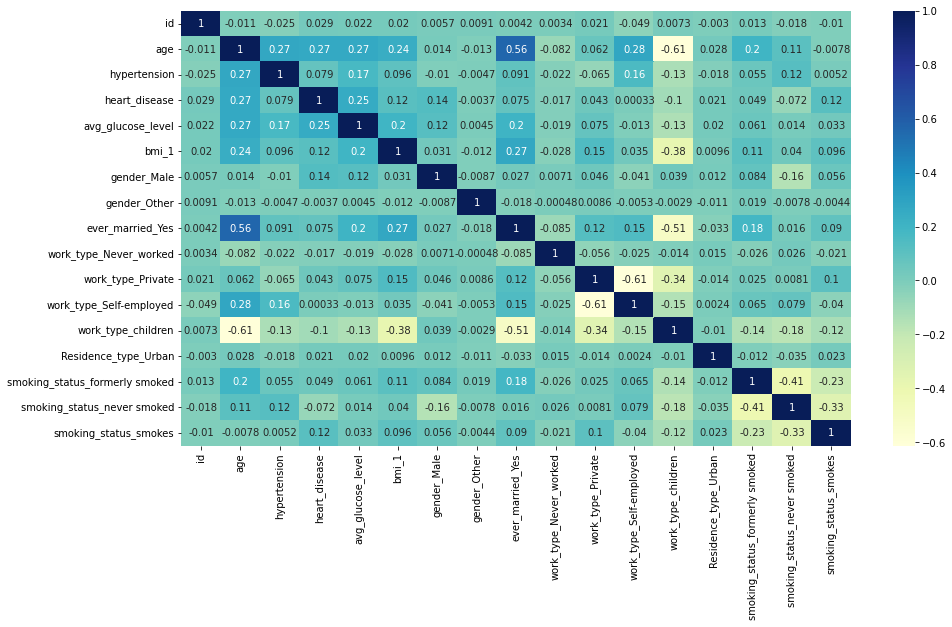

In [55]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")    ## Heat map 
plt.show()

###  <font color = 'green'> 4.4<span style='color:#0386f7de'>|</span> Splitting data into train & test set <a id="prep"></a></font>

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled, y, random_state = 12, stratify = y )

In [57]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7290, 17), (2431, 17), (7290, 1), (2431, 1))

##  <font color = 'blue'><b>5 <span style='color:#0386f7de'>|</span> Model Building <a id="prep"></a></font>

###  <font color = 'green'>5.1 <span style='color:#0386f7de'>|</span> Logistic Regression <a id="prep"></a></font>

In [58]:
logistic_model = LogisticRegression()    ## Importing Model 
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [59]:
logistic_pred_train = logistic_model.predict(X_train)    ## Predicting the model for training data
print('Accuracy Score                 :',round(accuracy_score(y_train,logistic_pred_train),4))
print('Precision Score                :',round(precision_score(y_train,logistic_pred_train),4))
print('Recall Score                   :',round(recall_score(y_train,logistic_pred_train),4))
print('Confusion Matrix               :\n',confusion_matrix(y_train,logistic_pred_train))
print('Classification Report          :\n',classification_report(y_train,logistic_pred_train))

Accuracy Score                 : 0.7785
Precision Score                : 0.7583
Recall Score                   : 0.8176
Confusion Matrix               :
 [[2695  950]
 [ 665 2980]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.80      0.74      0.77      3645
           1       0.76      0.82      0.79      3645

    accuracy                           0.78      7290
   macro avg       0.78      0.78      0.78      7290
weighted avg       0.78      0.78      0.78      7290



In [60]:
logistic_pred_test = logistic_model.predict(X_test)   ## Predicting the model for test data
print('Accuracy Score                 :',round(accuracy_score(y_test,logistic_pred_test),4))
print('Precision Score                :',round(precision_score(y_test,logistic_pred_test),4))
print('Recall Score                   :',round(recall_score(y_test,logistic_pred_test),4))
print('Confusion Matrix               :\n',confusion_matrix(y_test,logistic_pred_test))
print('Classification Report          :\n',classification_report(y_test,logistic_pred_test))

Accuracy Score                 : 0.7729
Precision Score                : 0.7509
Recall Score                   : 0.8165
Confusion Matrix               :
 [[887 329]
 [223 992]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.80      0.73      0.76      1216
           1       0.75      0.82      0.78      1215

    accuracy                           0.77      2431
   macro avg       0.78      0.77      0.77      2431
weighted avg       0.78      0.77      0.77      2431



Area Under Curve     : 0.7729508474117394


Text(0, 0.5, 'True Positive Rate')

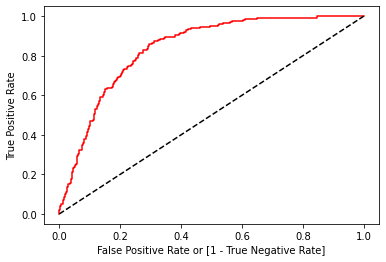

In [61]:
fpr, tpr, thresholds = roc_curve(y_test,logistic_model.predict_proba (X_test)[:,1])
auc_score = roc_auc_score(y_test, logistic_pred_test)                             
print('Area Under Curve     :',auc_score)                                            ## AUC-ROC curve(performance measurement for the classification problems at various threshold)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

###  <font color = 'green'>5.2 <span style='color:#0386f7de'>|</span> Decision Tree<a id="prep"></a></font>